# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [5]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [6]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [7]:
# Write your code here
# Export the shape of the data and it's basic stats
print("Number of data rows is: ", df.shape[0])
print("Number of columns is: ", df.shape[1])
print(df.columns)
df.describe(include='all')

Number of data rows is:  1898
Number of columns is:  9
Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898,1898,1898.000000,1898,1898,1898.000000,1898.000000
unique,NaN,NaN,178,14,NaN,2,4,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,Not given,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,736,NaN,NaN
mean,1.477496e+06,171168.478398,NaN,NaN,16.498851,NaN,NaN,27.371970,24.161749
std,5.480497e+02,113698.139743,NaN,NaN,7.483812,NaN,NaN,4.632481,4.972637
min,1.476547e+06,1311.000000,NaN,NaN,4.470000,NaN,NaN,20.000000,15.000000
25%,1.477021e+06,77787.750000,NaN,NaN,12.080000,NaN,NaN,23.000000,20.000000
50%,1.477496e+06,128600.000000,NaN,NaN,14.140000,NaN,NaN,27.000000,25.000000
75%,1.477970e+06,270525.000000,NaN,NaN,22.297500,NaN,NaN,31.000000,28.000000


#### Observations:

There are 1898 rows of data in the dataset and the following 9 columns:  

- 'order_id'
- 'customer_id'
- 'restaurant_name'
- 'cuisine_type'
- 'cost_of_the_order'
- 'day_of_the_week'
- 'rating'
- 'food_preparation_time'
- 'delivery_time'


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [8]:
# Use info() to print a concise summary of the DataFrame
print(df.info())
data = df.__deepcopy__()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None


#### Observations:

 #   Column                 Dtype  
---  ------                 --------------  
 - 0   order_id               int64  
 - 1   customer_id            int64  
 - 2   restaurant_name        object 
 - 3   cuisine_type           object 
 - 4   cost_of_the_order      float64
 - 5   day_of_the_week        object 
 - 6   rating                 object 
 - 7   food_preparation_time  int64  
 - 8   delivery_time          int64 


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [9]:
# Write your code here
number_of_rows_with_empty_values = data.isnull().any(axis=1).sum()
print("Number of rows with empty values: ", number_of_rows_with_empty_values)
number_of_empty_rows = data[data.isnull().all(axis=1)].shape[0]
if(number_of_empty_rows > 0):
    print("Number of empty rows: ", number_of_empty_rows)
    # Drop empty Rows from the dataset
    data = data.drop(data[data.isnull().all(axis=1)].index)
    print("Number of rows after dropping empty rows: ", data.shape[0])
else:
    print("No empty rows found")

Number of rows with empty values:  0
No empty rows found


#### Observations:
There were no rows found with empty values.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [10]:
# Write your code here
print(data.describe(include='all'))
print("Average Food Preparation Time: ", str(data['food_preparation_time'].mean().__floor__()) + " minutes")

            order_id    customer_id restaurant_name cuisine_type  \
count   1.898000e+03    1898.000000            1898         1898   
unique           NaN            NaN             178           14   
top              NaN            NaN     Shake Shack     American   
freq             NaN            NaN             219          584   
mean    1.477496e+06  171168.478398             NaN          NaN   
std     5.480497e+02  113698.139743             NaN          NaN   
min     1.476547e+06    1311.000000             NaN          NaN   
25%     1.477021e+06   77787.750000             NaN          NaN   
50%     1.477496e+06  128600.000000             NaN          NaN   
75%     1.477970e+06  270525.000000             NaN          NaN   
max     1.478444e+06  405334.000000             NaN          NaN   

        cost_of_the_order day_of_the_week     rating  food_preparation_time  \
count         1898.000000            1898       1898            1898.000000   
unique                NaN

#### Observations:
Average Food Preparation Time:  27 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [11]:
not_given_items = data[data["rating"].str.contains("Not given")]

print("Total not rated orders: ", not_given_items['rating'].count()) 

Total not rated orders:  736


#### Observations:


There are a total of seven-hundred and thirty-six Not Rated orders.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

<Axes: xlabel='rating', ylabel='Count'>

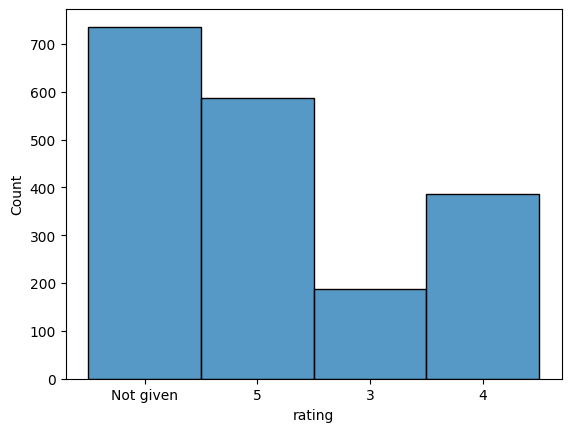

In [25]:
# Observe Ratings Distribution
sns.histplot(data['rating'])

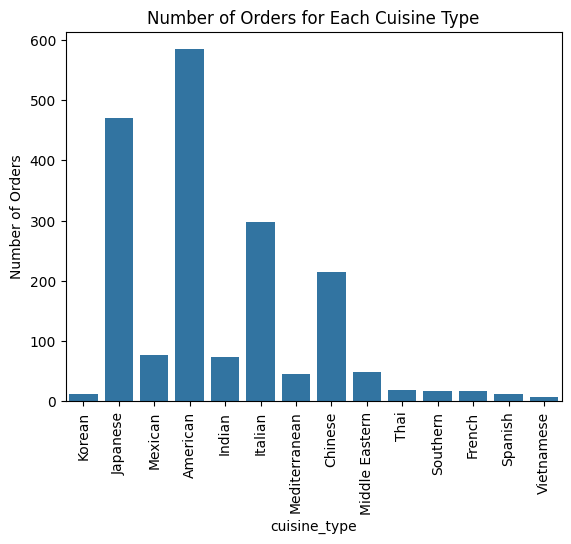

In [40]:
# Plot number of orders for each restaurant
sns.countplot(x='cuisine_type', data=data)
plt.title('Number of Orders for Each Cuisine Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()

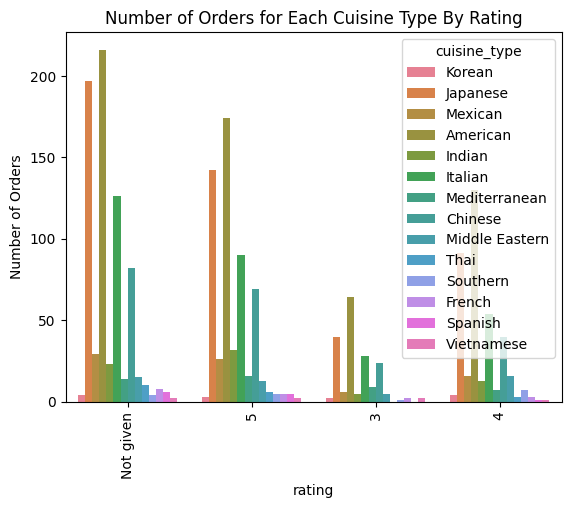

In [45]:
# Observe Ratings Distribution differentiated by Cuisine Type
sns.countplot(x='rating', hue='cuisine_type', data=data)
plt.title('Number of Orders for Each Cuisine Type By Rating')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()

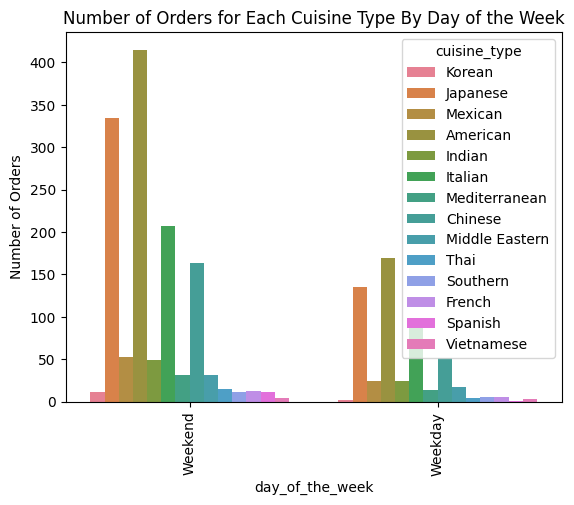

In [74]:
# Observe Most Popular Cuisine Type by Day of the Week
sns.countplot(x='day_of_the_week', hue='cuisine_type', data=data)
plt.title('Number of Orders for Each Cuisine Type By Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()

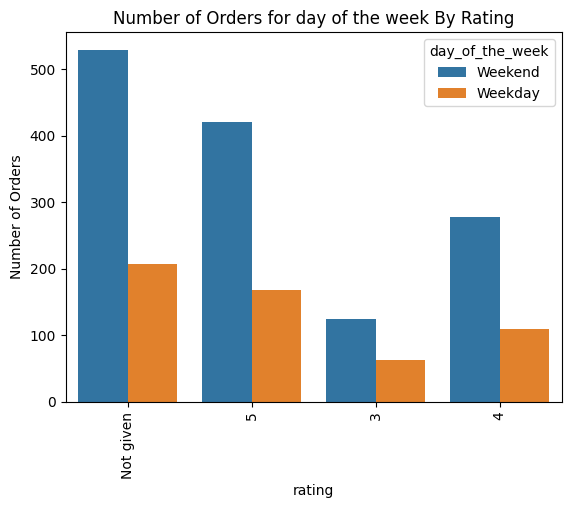

In [52]:
# Observe Ratings Distribution differentiated by Day of the Week
sns.countplot(x='rating', hue='day_of_the_week', data=data)
plt.title('Number of Orders for day of the week By Rating')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='food_preparation_time'>

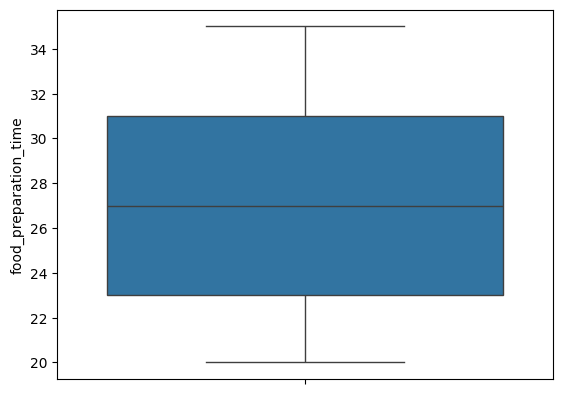

In [78]:
# Statistics on Food Prep Time
sns.boxplot(data['food_preparation_time'])



<Axes: ylabel='cost_of_the_order'>

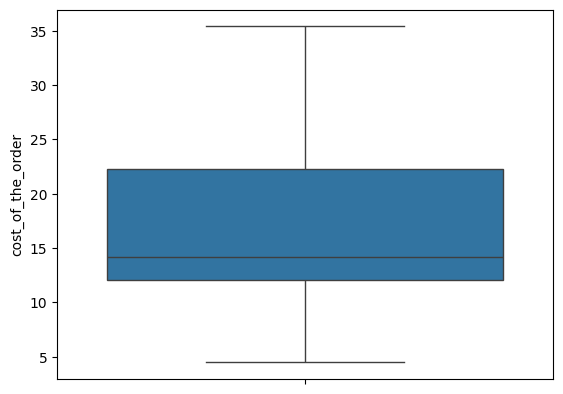

In [79]:
# Statistics on Food Price
sns.boxplot(data['cost_of_the_order'])

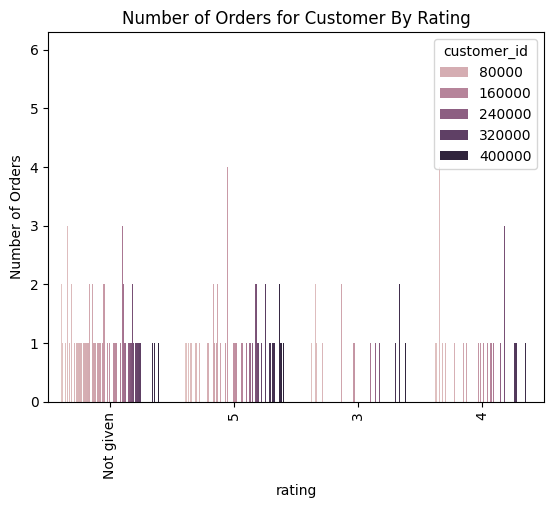

In [68]:
# Observe Ratings Distribution differentiated by Customer ID
sns.countplot(x='rating', hue='customer_id', data=data)
plt.title('Number of Orders for Customer By Rating')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [73]:
# Write the code here
top_restaurants = data['restaurant_name'].value_counts().sort_values(ascending=False)
print(top_restaurants.head(5))

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:

The Top Five Restaurants by Number of Orders are:

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [76]:
# Write the code here
weekend_orders = data[data['day_of_the_week'] == 'Weekend']
most_popular_cuisine = weekend_orders['cuisine_type'].value_counts().sort_values(ascending=False)
print(most_popular_cuisine.head())

cuisine_type
American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: count, dtype: int64


#### Observations:

As seen on the bar chart earlier and in the above data queries,  the most popular cuisine type on weekends is <strong>American Cuisine</strong>


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [84]:
# Write the code here
orders_over_twenty_dollars = data[data['cost_of_the_order'] > 20.0]
percentage_of_twentyplus_orders = (orders_over_twenty_dollars.shape[0]/data.shape[0] * 100)
print(round(percentage_of_twentyplus_orders,2))

29.24


#### Observations:
Roughly <strong>29%</strong> of the orders are over twenty dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

Mean Delivery time is:  24.161749209694417


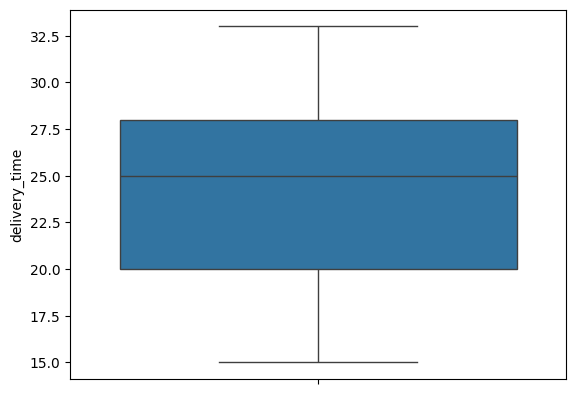

In [85]:
# Write the code here
sns.boxplot(data['delivery_time'])
print("Mean Delivery time is: ", data['delivery_time'].mean())

#### Observations:
As can be seen in the above boxplot and calculation, the average delivery time is: 24.16 Minutes



### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [86]:
# Write the code here
top_customers = data['customer_id'].value_counts().sort_values(ascending=False)
print(top_customers.head(3))

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:
The top customers by orders placed are:

- ID: 52832   Orders Placed: 13
- ID: 47440   Orders Placed:10
- ID: 83287   Orders Placed:9

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


C:\Users\Admin\AppData\Local\Temp\ipykernel_6952\3404804395.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transformed_data['day_of_the_week'] = transformed_data['day_of_the_week'].replace({'Weekend': 1, 'Weekday': 2})


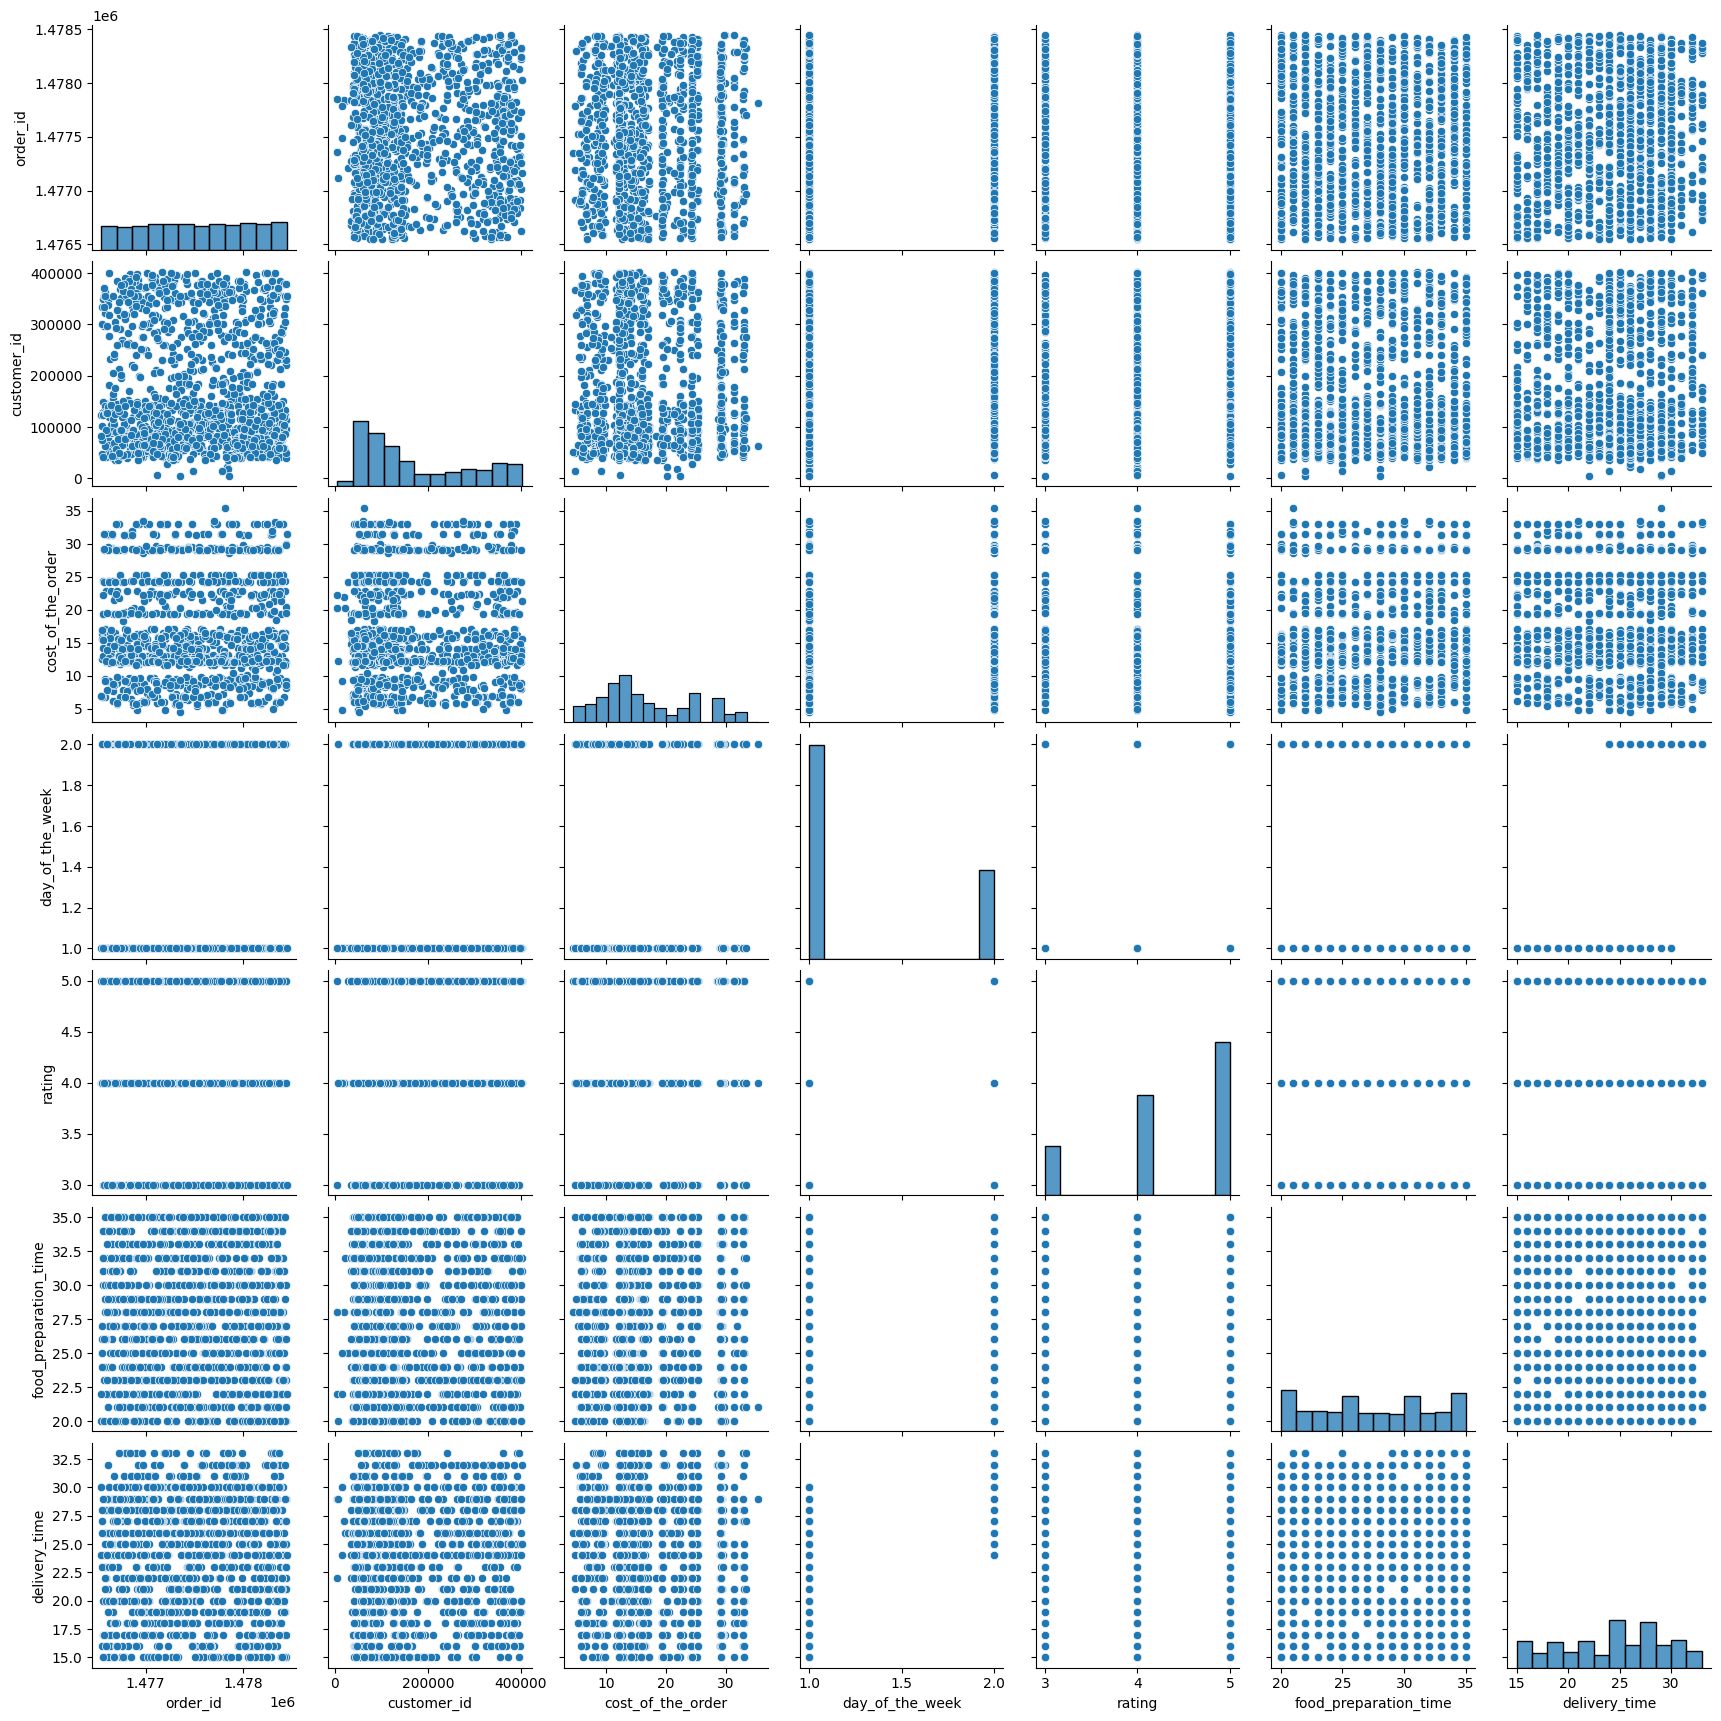

In [116]:
# Write the code here
# Will Start with Seaborn PairPlots to look for correlations in the variables.

# Do some Transformations on the Data so that we can view correlations...
transformed_data = data.__deepcopy__()
# Transform Day of the Week to Numerical
transformed_data['day_of_the_week'] = transformed_data['day_of_the_week'].replace({'Weekend': 1, 'Weekday': 2})
# Remove Not Rated Data
transformed_data = transformed_data[pd.to_numeric(data['rating'], errors='coerce').notna()]
transformed_data.dropna(subset=['rating'], inplace=True)
transformed_data['rating'] = transformed_data['rating'].astype(float)

sns.pairplot(transformed_data)

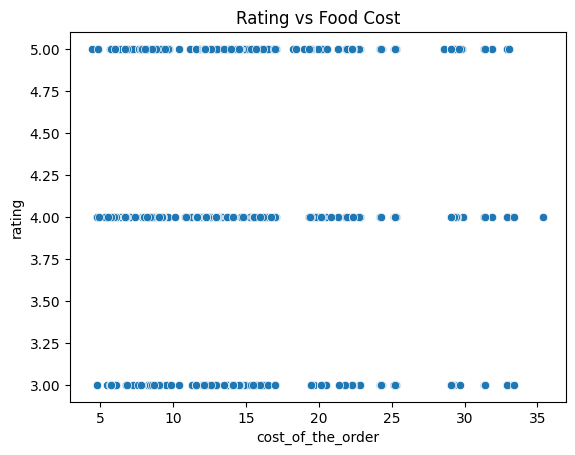

In [117]:
# Observe Rating Vs Order Cost

# Create a scatter plot with seaborn
sns.scatterplot(x='cost_of_the_order', y='rating', data=transformed_data)

# Add title
plt.title('Rating vs Food Cost')

# Show the plot
plt.show()

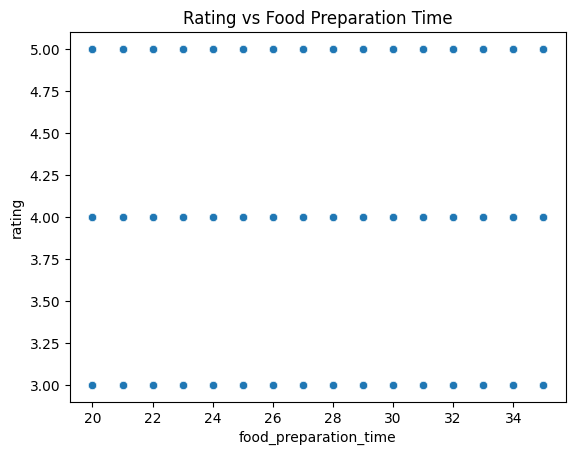

In [118]:
# Observe Rating Vs Food Preperation Time

# Create a scatter plot with seaborn
sns.scatterplot(x='food_preparation_time', y='rating', data=transformed_data)

# Add title
plt.title('Rating vs Food Preparation Time')

# Show the plot
plt.show()

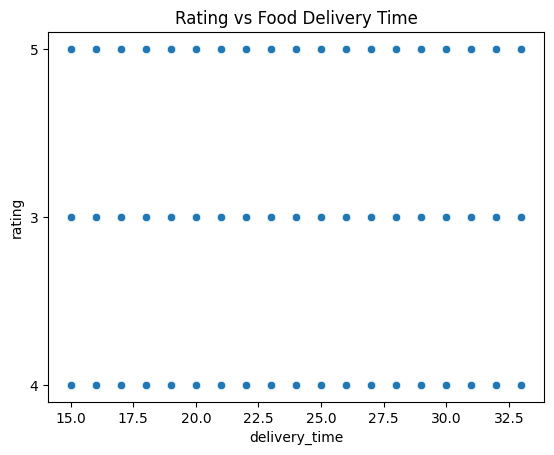

In [99]:
# Observe Rating Vs Food Delivery Time

# Create a scatter plot with seaborn
sns.scatterplot(x='delivery_time', y='rating', data=transformed_data)

# Add title
plt.title('Rating vs Food Delivery Time')

# Show the plot
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [121]:
# Write the code here
# Get the count of rated orders for each restaurants
rated_orders_per_restaurant = transformed_data['restaurant_name'].value_counts()

# Filter the DataFrame based on rated order count being greater than 50
restaurants_filtered = transformed_data[transformed_data['restaurant_name'].isin(rated_orders_per_restaurant[rated_orders_per_restaurant > 50].index)]

# Find the Restaurants with Average Ratings Over 4
restaurants_average_rating = restaurants_filtered.groupby('restaurant_name')['rating'].mean()
qualifying_restaurants = restaurants_average_rating[(restaurants_average_rating > 4)]
print(qualifying_restaurants.head(50))


restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: rating, dtype: float64


#### Observations:

Qualifying Restaurants are:

Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
The Meatball Shop            4.511905


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---